In [86]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os
import numpy as np

#source: in class examples
# Study data files
pwd = os.path.abspath('.')
mouse_metadata_path = os.path.join(pwd, 'Mouse_metadata.csv')
study_results_path = os.path.join(pwd, 'Study_results.csv')

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_mice = pd.merge(mouse_metadata, study_results, 
                           how='outer', on='Mouse ID')

# Display the data table for preview
combined_mice.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [14]:
#source: in class examples
study_results['Tumor Volume (mm3)'].describe()

count    1893.000000
mean       50.448381
std         8.894722
min        22.050126
25%        45.000000
50%        48.951474
75%        56.292200
max        78.567014
Name: Tumor Volume (mm3), dtype: float64

In [88]:
# Checking the number of mice.
#combined_mice.columns = combined_mice.columns.astype("str")

mice_count = combined_mice['Mouse ID'].value_counts().count()

mice_count


249

In [89]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

unique_combined_mice_m = combined_mice.duplicated(subset=['Mouse ID', 'Timepoint'])
duplicate_mouse_id = set(combined_mice[unique_combined_mice_m]['Mouse ID'])
duplicate_mouse_id


{'g989'}

In [90]:
# Optional: Get all the data for the duplicate mouse ID. 
data_duplicate_mouse_id = combined_mice[combined_mice['Mouse ID'] == 'g989']
data_duplicate_mouse_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [91]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_mice[combined_mice['Mouse ID'] != 'g989'] 
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [92]:
#list column names 
# https://www.geeksforgeeks.org/how-to-get-column-names-in-pandas-dataframe/
list(clean_df.columns)

['Mouse ID',
 'Drug Regimen',
 'Sex',
 'Age_months',
 'Weight (g)',
 'Timepoint',
 'Tumor Volume (mm3)',
 'Metastatic Sites']

In [93]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
#and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
#Sources

drug_tumor = clean_df.groupby(['Drug Regimen'])

drug_tumor_mean = drug_tumor['Tumor Volume (mm3)'].mean()
drug_tumor_median = drug_tumor['Tumor Volume (mm3)'].median()
drug_tumor_variance = drug_tumor['Tumor Volume (mm3)'].var()
drug_tumor_standard_deviation = drug_tumor['Tumor Volume (mm3)'].std()
drug_tumor_sem = drug_tumor['Tumor Volume (mm3)'].sem()

drug_tumor_sum_stats = pd.DataFrame({'mean': drug_tumor_mean, 'median': drug_tumor_median,
                                        'varaince': drug_tumor_variance,
                                        'standard deviation': drug_tumor_standard_deviation,
                                        'sem': drug_tumor_sem})
drug_tumor_sum_stats





,mean,median,varaince,standard deviation,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [94]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
#for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
#source: In class examples
#source: https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.core.groupby.DataFrameGroupBy.agg.html
#source: #https://www.youtube.com/watch?v=txMdrV1Ut64


#

drug_tumor_stats_2 = clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

drug_tumor_stats_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

Text(0.5, 1.0, 'Timepoints per Drug Regimen')

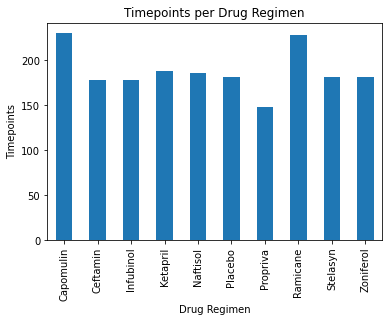

In [260]:
# Generate a bar plot showing the total number of timepoints for 
#all mice tested for each drug regimen using Pandas.
# Source: In class examples

count_timepoints = drug_tumor['Drug Regimen'].count()

count_timepoints

count_chart = count_timepoints.plot.bar()

count_chart.set_xlabel("Drug Regimen")

count_chart.set_ylabel("Timepoints")

count_chart.set_title('Timepoints per Drug Regimen')



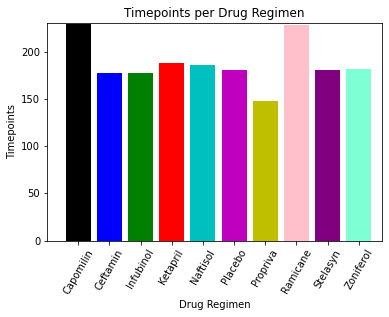

In [262]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Source: In class examples
# source: https://matplotlib.org/stable/tutorials/colors/colors.html

colors = ('k', 'b', 'g', 'r', 'c', 'm', 'y', 'pink', 'purple', 'aquamarine')
x_axis = np.arange(len(count_timepoints))
plt.bar(x_axis, count_timepoints, color = colors, align = 'center')
drugs = ['Capomilin','Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
tick_locations = [value for value in x_axis]

plt.title("Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.xlim(-0.99, len(x_axis)-0.25)
plt.ylim(0, max(count_timepoints)+0.4)
plt.xticks(tick_locations, drugs, rotation = 60)



plt.show()


array([<AxesSubplot:ylabel='Sex Distribution'>], dtype=object)

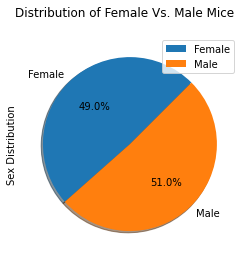

In [170]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Source: https://kontext.tech/column/code-snippets/402/pandas-dataframe-plot-pie-chart

mf_distribution = clean_df[['Sex']].value_counts()


# # plot = mf_distribution.plot(kind = 'pie', y='Sex', figsize=(5,5), autopct='%1.1f%%', shadow = True, colors=('blue', 'pink'))

# # plt.title("Distribution of Female Vs. Male Mice")

# # mf_distribution 


# plot = mf_distribution.plot.pie(subplots=True, figsize=(5,5))

mf_distribution.groupby(['Sex']).sum().plot(kind = 'pie', subplots = True, shadow = True, startangle = 45, autopct = '%1.1f%%', title = "Distribution of Female Vs. Male Mice", ylabel = "Sex Distribution", legend = True)



Text(0.5, 1.0, 'Distribution of Female Vs. Male Mice')

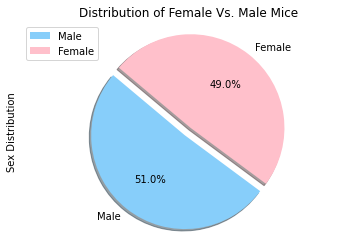

In [172]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#sources: 
#In class examples / 
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html
#https://www.w3schools.com/python/matplotlib_pie_charts.asp

mf_distribution = clean_df[['Sex']].value_counts()


labels = ['Male', 'Female']

colors = ["lightskyblue", "pink"]

sizes = ['mf_distribution']

explode = (0.1, 0)


plt.pie(mf_distribution, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.ylabel("Sex Distribution")
plt.legend(labels=labels,loc="best")

plt.axis("equal")
plt.title("Distribution of Female Vs. Male Mice")


In [99]:
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [100]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#Source https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.max.html
drug_tumor_gt = clean_df.groupby('Mouse ID')['Timepoint'].max()

dtgt = pd.DataFrame(drug_tumor_gt)
dtgt

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [101]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint'
#source: in class examples

combined_df = pd.merge(drug_tumor_gt, clean_df, 
                           how='left', on=['Mouse ID', 'Timepoint'])

combined_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [102]:
#Create new df with just four drugs we want to investigate
#source: https://www.youtube.com/watch?v=Lw2rlcxScZY&list=RDCMUCCezIgC97PvUuR4_gbFUs5g&index=4
four_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filt = combined_df["Drug Regimen"].isin(four_drugs)
final_tumor_vol = combined_df.loc[filt]

final_tumor_vol

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
# I created this list, but commented out.  Used isin fuction above
#four_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
# I created empty list, but I commented it out.  Used isin function
#four_drugs_final_values = []


In [103]:
final_tumor_vol.describe()


,Timepoint,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,35.700000,13.520000,23.710000,47.197795,1.45000
std,14.442852,7.608448,4.472802,12.953884,1.14922
min,0.000000,1.000000,15.000000,22.050126,0.00000
25%,30.000000,7.000000,20.000000,37.187744,1.00000
50%,45.000000,15.000000,25.000000,45.000000,1.00000
75%,45.000000,20.000000,27.250000,59.930262,2.00000
max,45.000000,24.000000,30.000000,72.226731,4.00000


In [104]:
# Create quatiles only dataframe
#Source: In class example
quartiles = final_tumor_vol['Tumor Volume (mm3)'].quantile([.25,.5,.75])
quartiles

0.25    37.187744
0.50    45.000000
0.75    59.930262
Name: Tumor Volume (mm3), dtype: float64

In [105]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# In class example / https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html
#source: https://towardsdatascience.com/how-to-use-loc-and-iloc-for-selecting-data-in-pandas-bd09cb4c3d79#:~:text=The%20main%20distinction%20between%20loc,0%2Dbased%20integer%20position).
upperq = quartiles.iloc[2]
median = quartiles.iloc[1]
lowerq = quartiles.iloc[0]
iqr = upperq - lowerq

 # Determine outliers using upper and lower bounds
print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {median}")

The lower quartile of tumor volume is: 37.1877438025
The upper quartile of tumor volume is: 59.930261755
The interquartile range of tumor volume is: 22.742517952499995
The the median of tumor volume is: 45.0


In [106]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Source: In class examples

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


Values below 3.0739668737500097 could be outliers.
Values above 94.04403868374999 could be outliers.


In [108]:
# Create empty list to fill with tumor vol data (for plotting)
# commented out as I did not need this. tumor_volume_data = []   



In [109]:
#source = in class examples
capomulin_df = combined_df[combined_df['Drug Regimen'] == 'Capomulin']
ramicane_df = combined_df[combined_df['Drug Regimen'] == 'Ramicane']
infubinol_df = combined_df[combined_df['Drug Regimen'] == 'Infubinol']
ceftamin_df = combined_df[combined_df['Drug Regimen'] == 'Ceftamin']


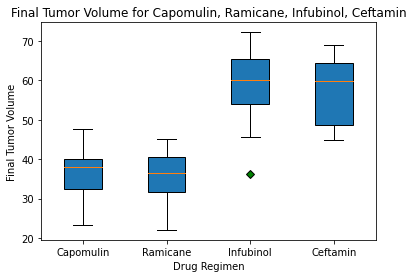

In [244]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#four_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
#source: https://stackoverflow.com/questions/52273543/creating-multiple-boxplots-on-the-same-graph-from-a-dictionary/52274064

# my_dict = {'Capomulin':, 'Ramicane':, 'Infubinol':, 'Ceftamin':}


# fig,ax = plt.subplots()
# ax.set_title('Final Tumor Volume')
# ax.set_ylabel('Tumor Volume (mm3)')
# ax.boxplot(my_dict.values())
# ax.set_xticklabels(my_dict.keys())
# plt.show

# boxplot1 = capomulin_df.boxplot(column = ["Tumor Volume (mm3)"], return_type='axes')
# boxplot2 = ramicane_df.boxplot(column = ["Tumor Volume (mm3)"], return_type='axes') 
# boxplot3 = infubinol_df.boxplot(column = ["Tumor Volume (mm3)"], return_type='axes') 
# boxplot4 = capomulin_df.boxplot(column = ["Tumor Volume (mm3)"], return_type='axes') 

bp1 = pd.Series(capomulin_df['Tumor Volume (mm3)'])
bp2 = pd.Series(ramicane_df['Tumor Volume (mm3)'])
bp3 = pd.Series(infubinol_df['Tumor Volume (mm3)'])
bp4 = pd.Series(ceftamin_df['Tumor Volume (mm3)'])

labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

green_diamond = dict(markerfacecolor='g', marker='D')
data_box = [bp1, bp2, bp3, bp4]
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume for Capomulin, Ramicane, Infubinol, Ceftamin")
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(data_box, flierprops=green_diamond, patch_artist=True)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']) 
plt.show()

#print(len(data_box))
#print(len(data_box[0]))

In [135]:
#show df tp pick mouse id
#source: in class examples
capomulin_df = combined_df[combined_df['Drug Regimen'] == 'Capomulin']
capomulin_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2
24,b742,45,Capomulin,Male,7,21,38.939633,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
64,g288,45,Capomulin,Male,3,19,37.074024,1
66,g316,45,Capomulin,Female,22,22,40.159220,2
80,i557,45,Capomulin,Female,1,24,47.685963,1
83,i738,45,Capomulin,Female,23,20,37.311846,2
85,j119,45,Capomulin,Female,7,23,38.125164,1
87,j246,35,Capomulin,Female,21,21,38.753265,1
108,l509,45,Capomulin,Male,17,21,41.483008,3


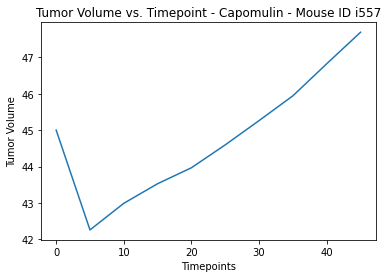

In [42]:
#generate a line plot of tumor volume vs. time point for a mouse treated with capomulin
#selected Mouse ID i557 for charting
#source: In class examples / https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9
#source: https://pandas.pydata.org/docs/reference/api/pandas.Series.html

capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

one_capomulin_mouse = capomulin_df[capomulin_df["Mouse ID"] == 'i557']
one_capomulin_mouse

plt.plot(one_capomulin_mouse ['Timepoint'], one_capomulin_mouse['Tumor Volume (mm3)'])
plt.title("Tumor Volume vs. Timepoint - Capomulin - Mouse ID i557")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume")
plt.show()




In [43]:
one_capomulin_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
431,i557,Capomulin,Female,1,24,0,45.000000,0
432,i557,Capomulin,Female,1,24,5,42.261665,0
433,i557,Capomulin,Female,1,24,10,42.992077,0
434,i557,Capomulin,Female,1,24,15,43.529876,0
435,i557,Capomulin,Female,1,24,20,43.967895,0
436,i557,Capomulin,Female,1,24,25,44.596219,0
437,i557,Capomulin,Female,1,24,30,45.261384,0
438,i557,Capomulin,Female,1,24,35,45.941949,0
439,i557,Capomulin,Female,1,24,40,46.821070,1
440,i557,Capomulin,Female,1,24,45,47.685963,1


Text(0, 0.5, 'Tumor Volume')

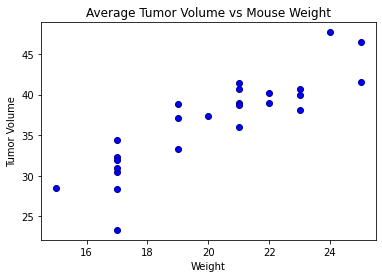

In [168]:
# Generate a scatter plot of average tumor volume vs.mouse weight for the Capomulin regimen

one_drug_df_weight = capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()
one_drug_df_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()



plt.scatter(one_drug_df_weight, one_drug_df_tumor_volume, marker="o", facecolors="blue", edgecolors="darkblue")
# # plt.ylim(180,620)
# # plt.xlim(11,26)
plt.title("Average Tumor Volume vs Mouse Weight")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")

In [169]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#source in class examples

# correlation coefficient
correlation = st.pearsonr(one_drug_df_weight, one_drug_df_tumor_volume)


print(f"The correlation between both factors is {correlation[0]:.2f}")

std_weight = np.std(one_drug_df_weight)
std_tumor_volume = np.std(one_drug_df_tumor_volume)

m = (std_weight / std_tumor_volume) * correlation[0] ** 2

b = np.mean(one_drug_df_tumor_volume) - m * np.mean(one_drug_df_weight)

x = 'Weight_Capomulin'
y = 'Predicted Tumor Volume'

print(f'The linear regression model is: {y} = {b:.3f} + {m:.3f} * {x}')

The correlation between both factors is 0.88
The linear regression model is: Predicted Tumor Volume = 28.922 + 0.385 * Weight_Capomulin
